In [1]:
import sys

sys.path.append("..")

from layzee.dataframe_observer import *
from layzee.feature_handling2 import *

from layzee.feature_drift import *
import os

DF1_PATH = '../data/california_train.csv'
DF2_PATH = '../data/california_test.csv'

OUTPUT_PATH = '../report_california_drift/'
if not os.path.isdir(OUTPUT_PATH):
    os.mkdir(OUTPUT_PATH)

TARGET = 'SalePrice'
UNIQUE_PERCENTAGE_THRESHOLD = None  # set to None to skip auto type switch

writer = pd.ExcelWriter(OUTPUT_PATH + "report.xlsx")


In [2]:
# df summary
df1 = pd.read_csv(DF1_PATH)
df1_info = read_df_info(df1, return_result=True)

df2 = pd.read_csv(DF2_PATH)
df2_info = read_df_info(df2, return_result=True)

# drop target
target_col = TARGET
if target_col in df1.columns.tolist():
    df1.drop(target_col, axis=1, inplace=True)
if target_col in df2.columns.tolist():
    df2.drop(target_col, axis=1, inplace=True)

# drop id
id_cols = df1_info[df1_info['unique%'] == 1].index.tolist()
df1.drop(id_cols, axis=1, inplace=True)
df2.drop(id_cols, axis=1, inplace=True)

# auto type switch
if UNIQUE_PERCENTAGE_THRESHOLD is not None:
    high_unique_cols = df1_info[df1_info['unique%'] < UNIQUE_PERCENTAGE_THRESHOLD].index.tolist()
    for col in high_unique_cols:
        if df1[col].dtype != 'object':
            print(col + ' is set to numerical')
            df1[col] = df1[col].astype('object')
            df2[col] = df2[col].astype('object')


cat_cols = df1.select_dtypes('object').columns.tolist()
num_cols = df1.select_dtypes('number').columns.tolist()
cat_cols = set(cat_cols) - set(id_cols) - set(target_col)
num_cols = set(num_cols) - set(id_cols) - set(target_col)
print(str(len(cat_cols)) + ' cat cols:')
print(cat_cols)
print(str(len(num_cols)) + ' num cols:')
print(num_cols)

df1_info = read_df_info(df1, return_result=True)
df1_info.to_excel(writer, sheet_name="df_train_info")

df2_info = read_df_info(df2, return_result=True)
df2_info.to_excel(writer, sheet_name="df_test_info")

------------------
1460 rows, 81 columns.
------------------
                 dtype  unique   unique%  missing  missing%
Id               int64    1460  1.000000        0  0.000000
MSSubClass       int64      15  0.010274        0  0.000000
MSZoning        object       5  0.003425        0  0.000000
LotFrontage    float64     110  0.075342      259  0.177397
LotArea          int64    1073  0.734932        0  0.000000
Street          object       2  0.001370        0  0.000000
Alley           object       2  0.001370     1369  0.937671
LotShape        object       4  0.002740        0  0.000000
LandContour     object       4  0.002740        0  0.000000
Utilities       object       2  0.001370        0  0.000000
LotConfig       object       5  0.003425        0  0.000000
LandSlope       object       3  0.002055        0  0.000000
Neighborhood    object      25  0.017123        0  0.000000
Condition1      object       9  0.006164        0  0.000000
Condition2      object       8  0.00547

         df_train  df_test
Type        int64    int64
Rows         1460     1459
Min            20       20
Max           190      190
Mean      56.8973  57.3783
Median         50       50
Mode           20       20
StdDev    42.3006  42.7469
Distinct       15       16
Sum         83070    83715
Missing         0        0
Missing%        0        0
Skewness  1.40766  1.34669
Kurtosis  1.58019  1.34897
Outliers      103      104
Q1             20       20
Q3             70       70
IQR            50       50
Down          -55      -55
Up            145      145

Kolmogorov-Smirnov test:
KS statistic:  0.0165998478973213
Significance level:  0.05
p-value:  0.9851096906191914
<These 2 distributions follows the same distribution> cannot be rejected.
No drift.
         df_train    df_test
Type       object     object
Rows         1460       1459
Distinct        5          5
Missing         0          4
Missing%        0  0.0027416
-----------------df_train top 5 values:--------------------


/Users/FY/Desktop/workspaceMac/Layzee/layzee/feature_drift.py:264: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(3, 1, figsize=plot_size)


          df_train   df_test
Type         int64     int64
Rows          1460      1459
Min              1         1
Max              9         9
Mean       5.57534    5.5538
Median           5         5
Mode             5         5
StdDev      1.1128   1.11374
Distinct         9         9
Sum           8140      8103
Missing          0         0
Missing%         0         0
Skewness  0.693067  0.449165
Kurtosis   1.10641   1.85182
Outliers       125       127
Q1               5         5
Q3               6         6
IQR              1         1
Down           3.5       3.5
Up             7.5       7.5

Kolmogorov-Smirnov test:
KS statistic:  0.015623855709014431
Significance level:  0.05
p-value:  0.992306595170463
<These 2 distributions follows the same distribution> cannot be rejected.
No drift.
          df_train   df_test
Type         int64     int64
Rows          1460      1459
Min           1872      1879
Max           2010      2010
Mean       1971.27   1971.36
Median        197

<Figure size 432x288 with 0 Axes>

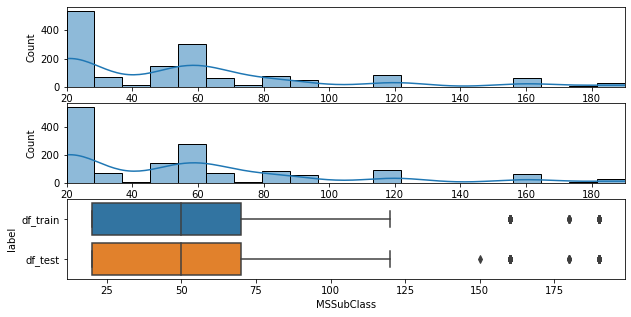

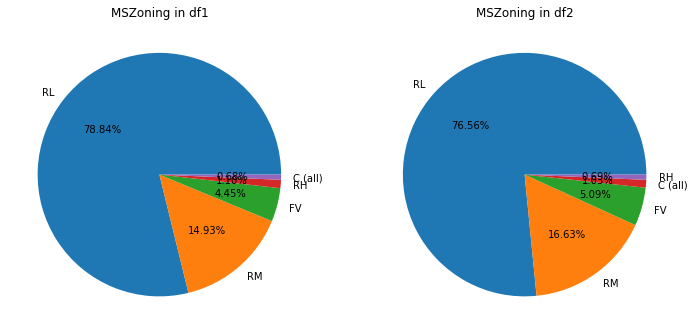

<Figure size 432x288 with 0 Axes>

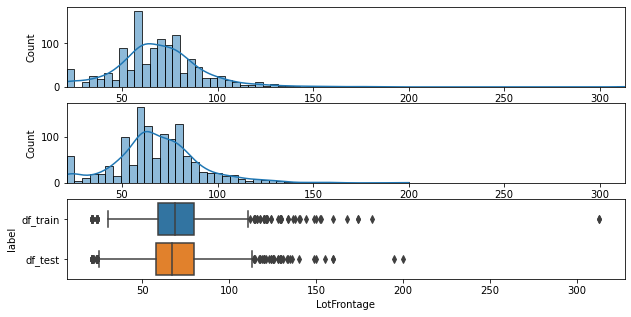

<Figure size 432x288 with 0 Axes>

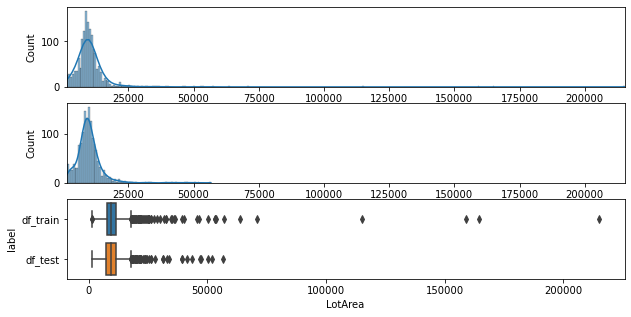

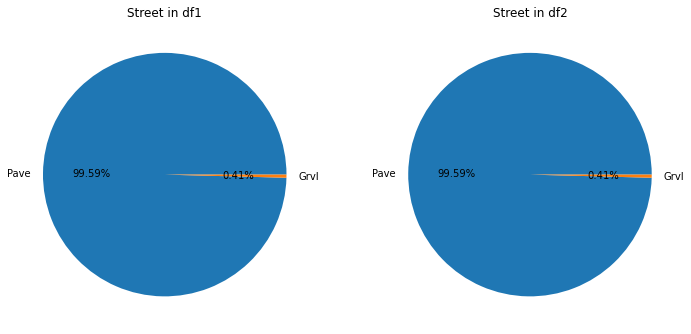

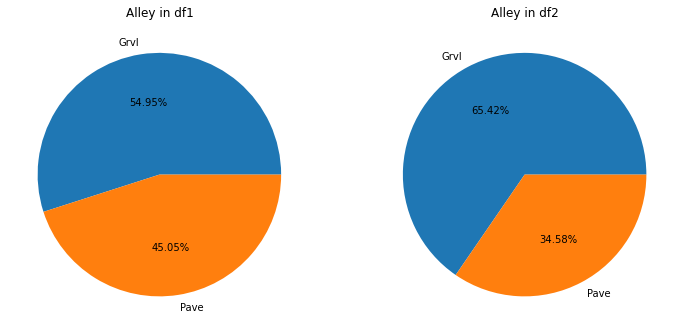

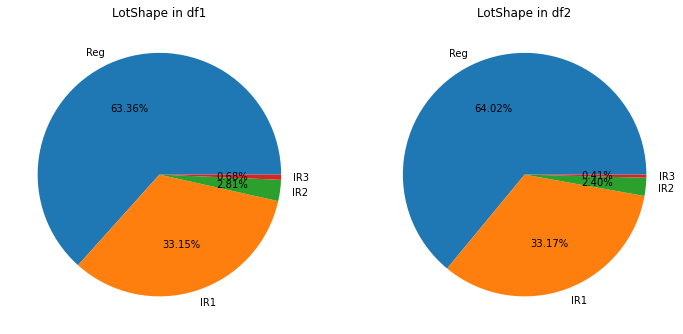

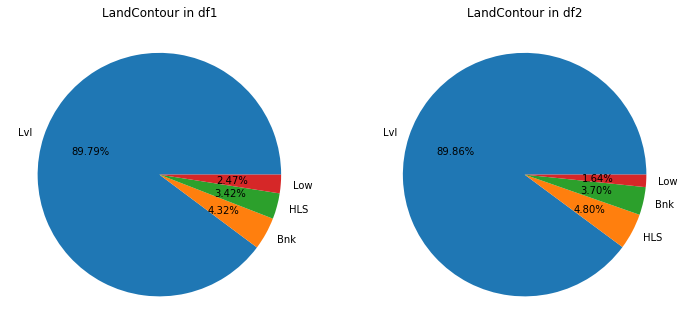

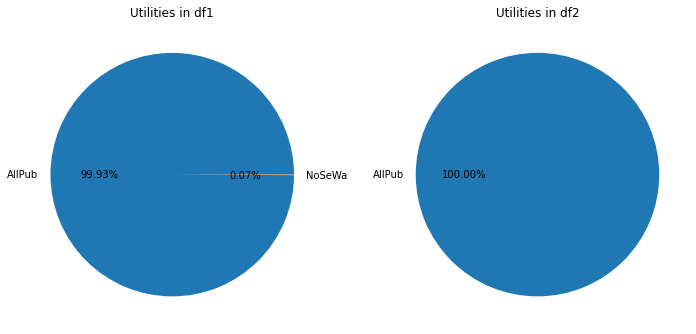

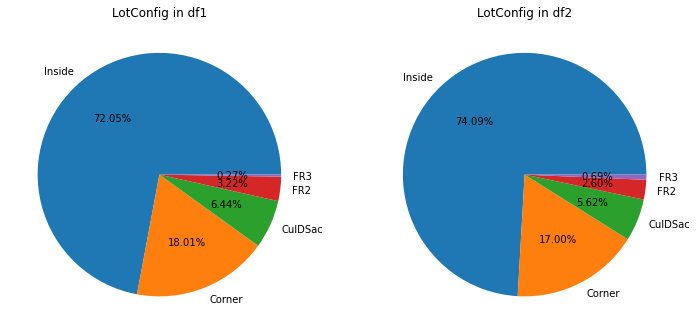

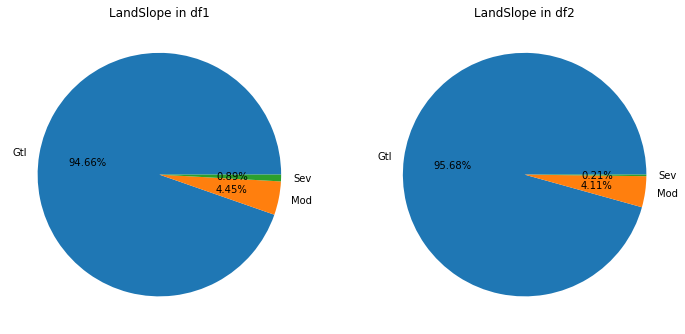

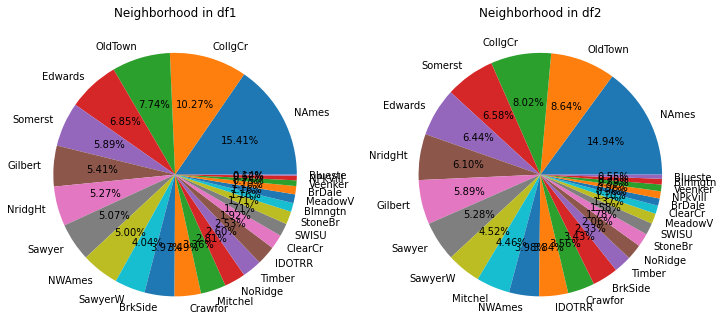

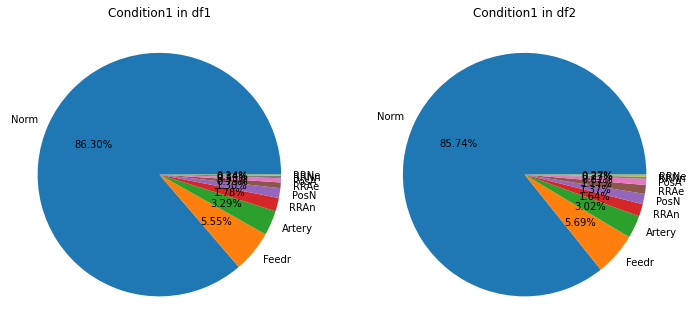

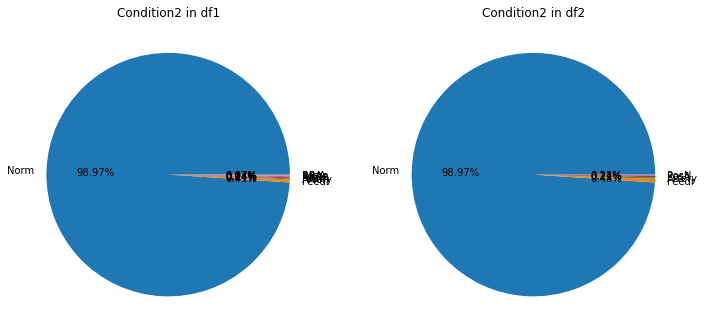

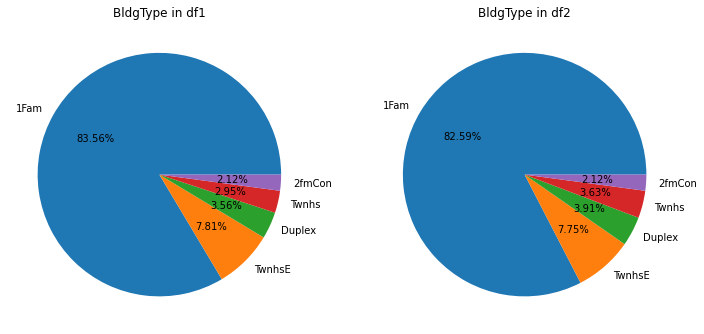

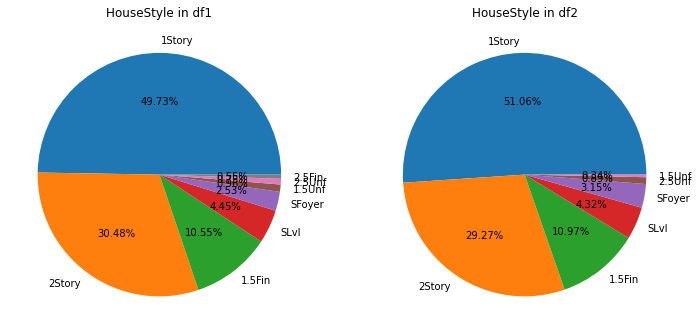

<Figure size 432x288 with 0 Axes>

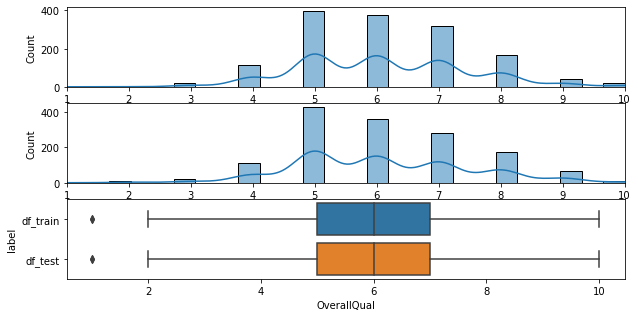

<Figure size 432x288 with 0 Axes>

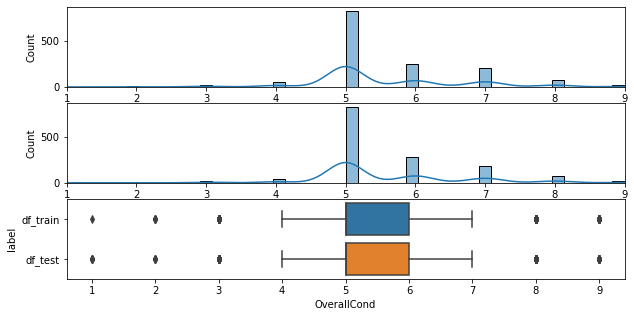

<Figure size 432x288 with 0 Axes>

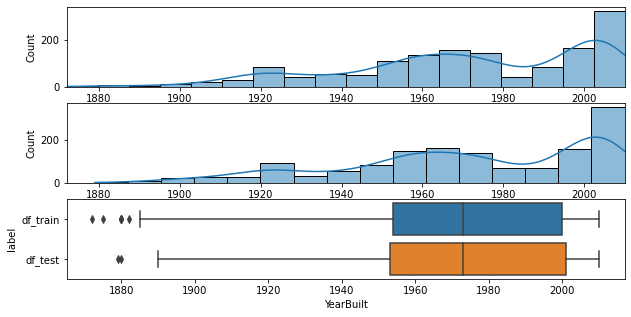

<Figure size 432x288 with 0 Axes>

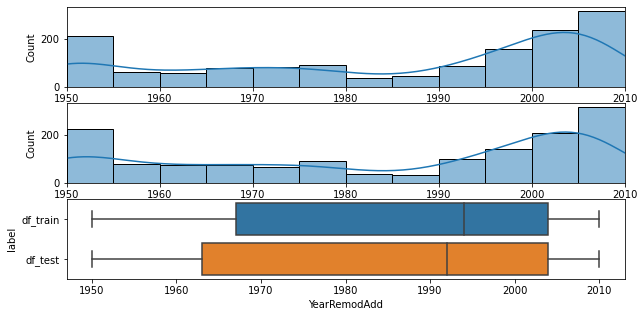

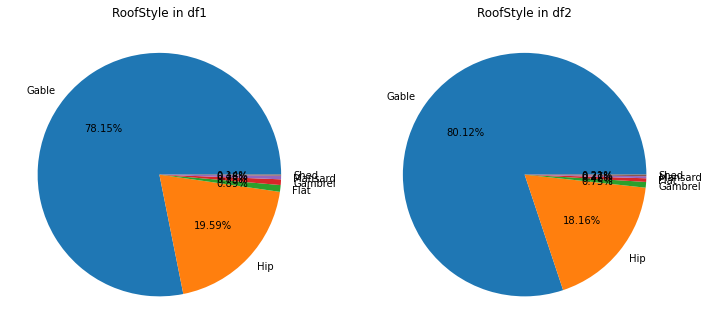

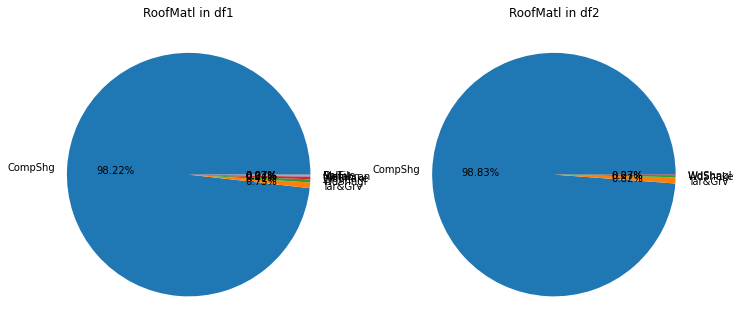

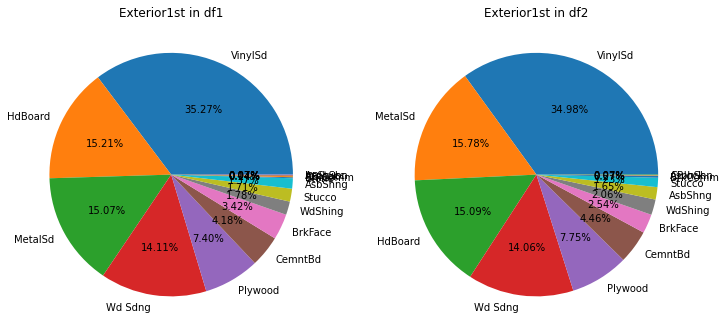

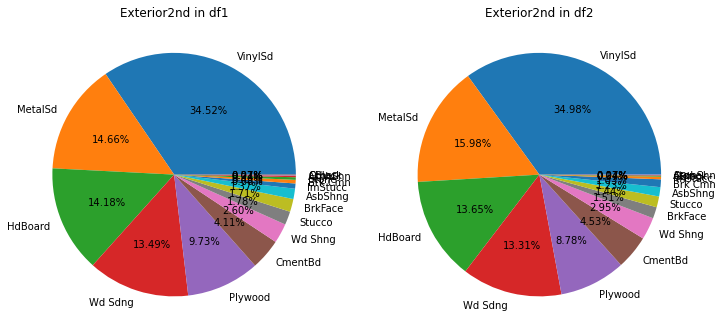

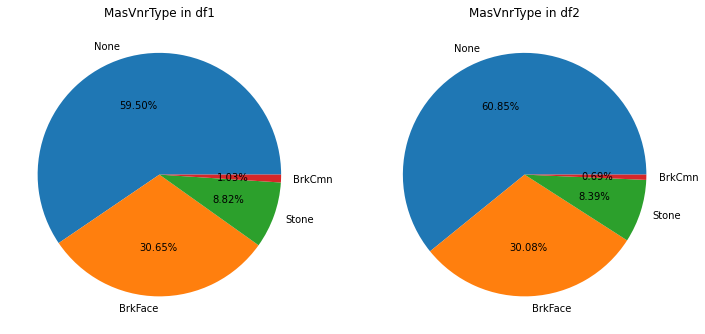

<Figure size 432x288 with 0 Axes>

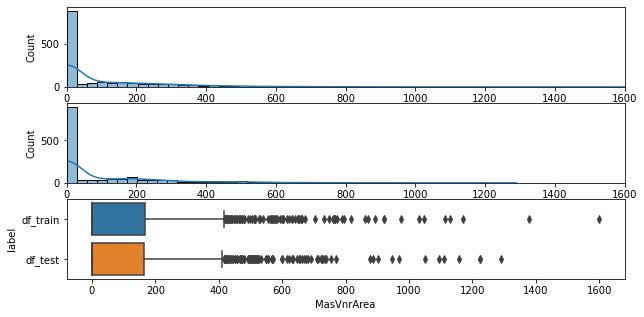

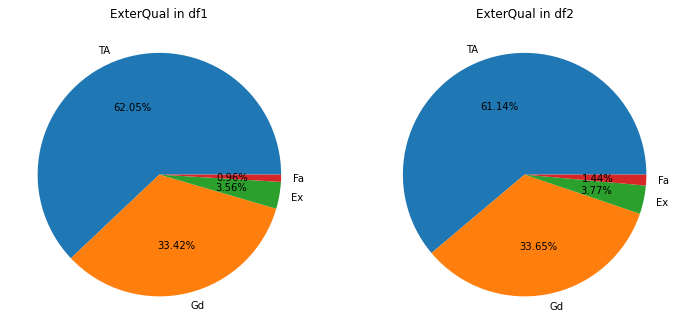

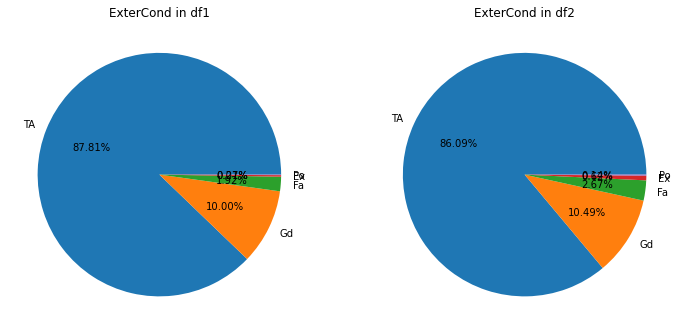

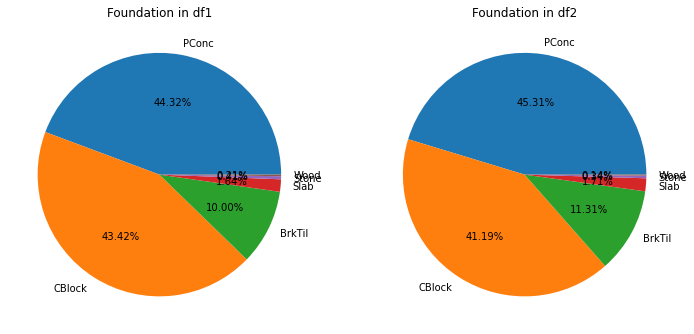

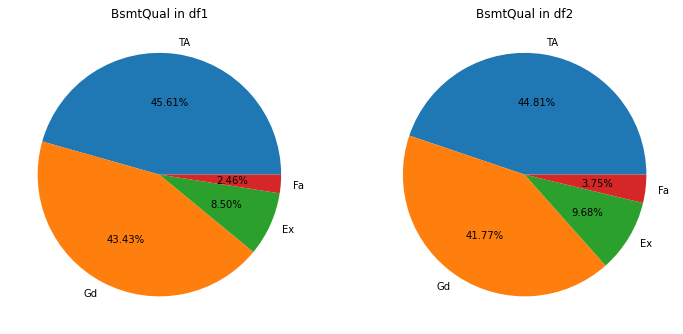

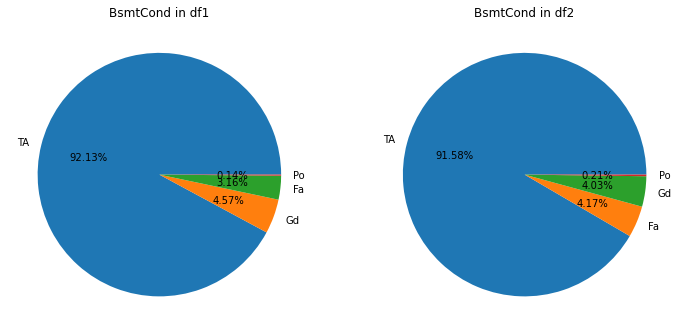

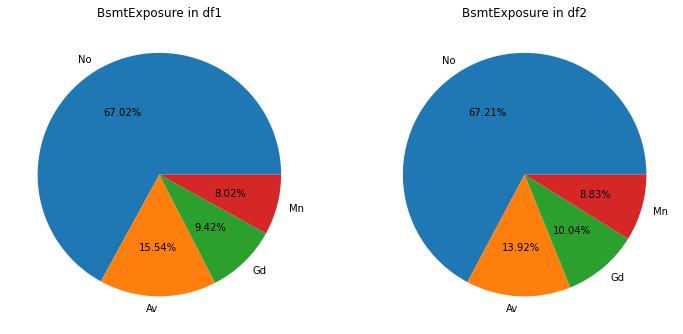

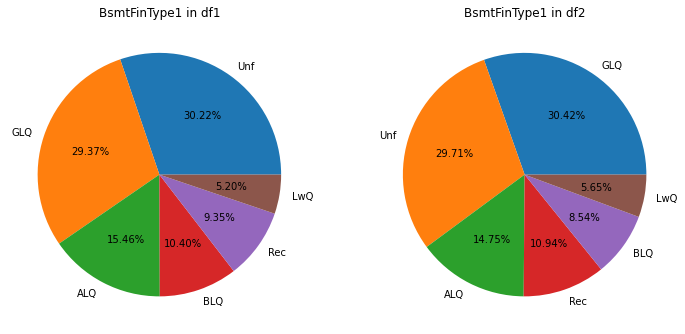

<Figure size 432x288 with 0 Axes>

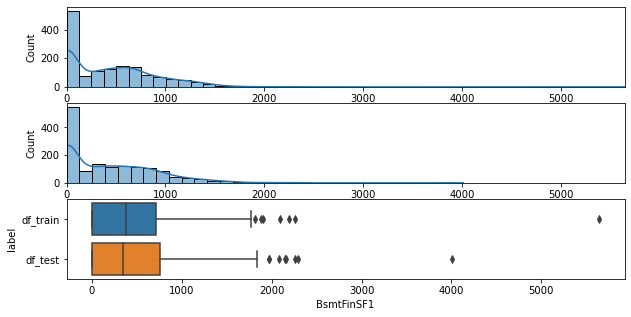

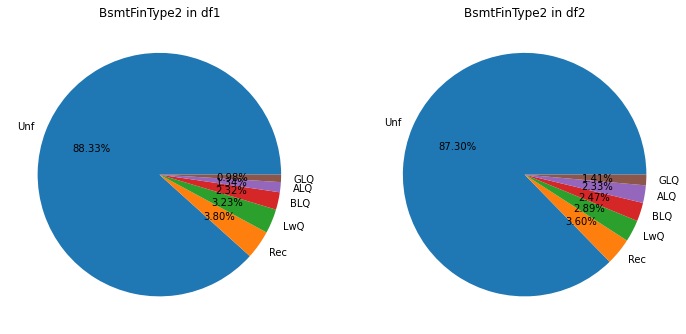

<Figure size 432x288 with 0 Axes>

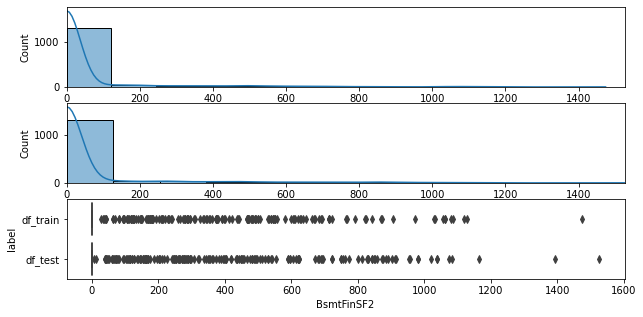

<Figure size 432x288 with 0 Axes>

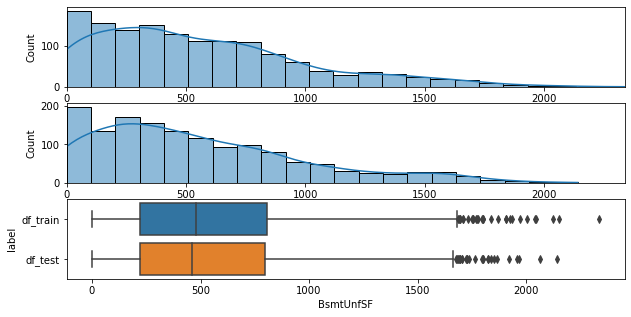

<Figure size 432x288 with 0 Axes>

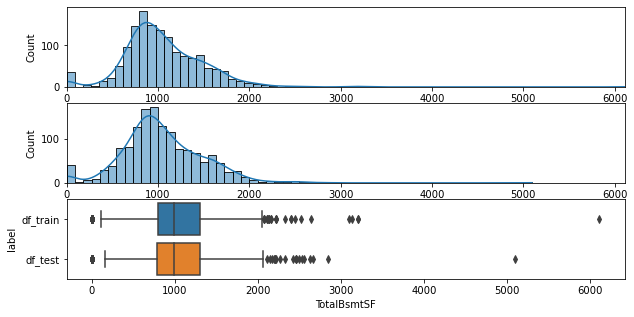

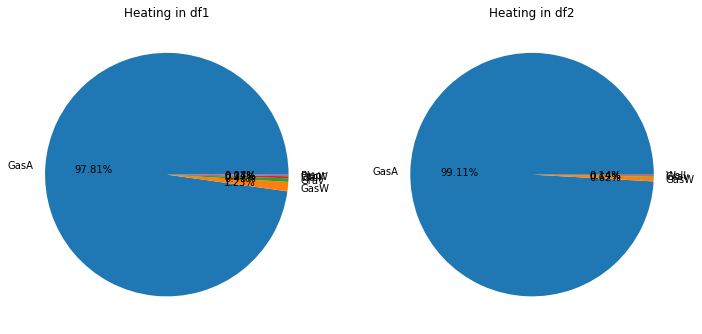

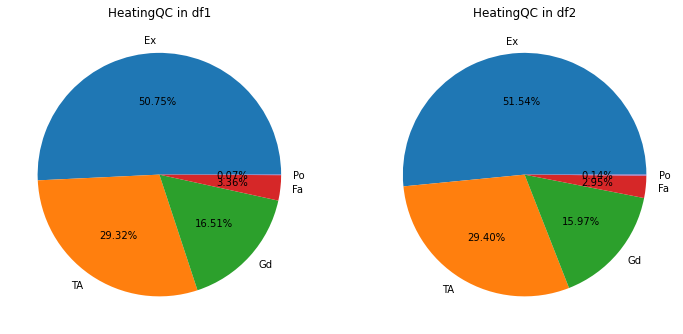

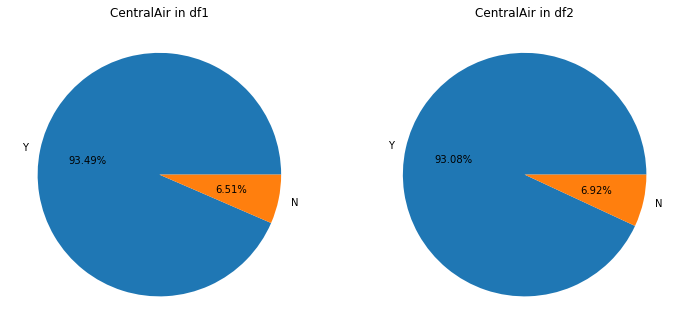

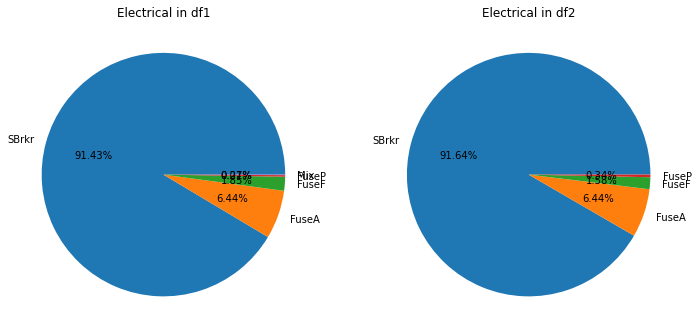

<Figure size 432x288 with 0 Axes>

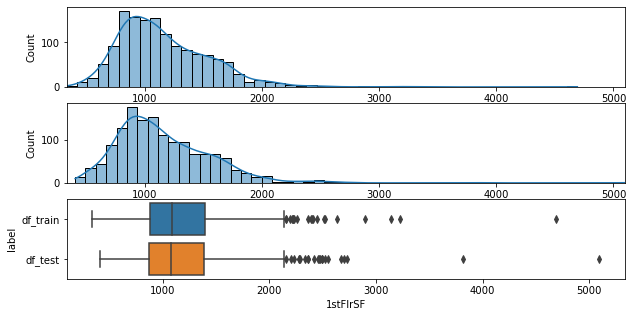

<Figure size 432x288 with 0 Axes>

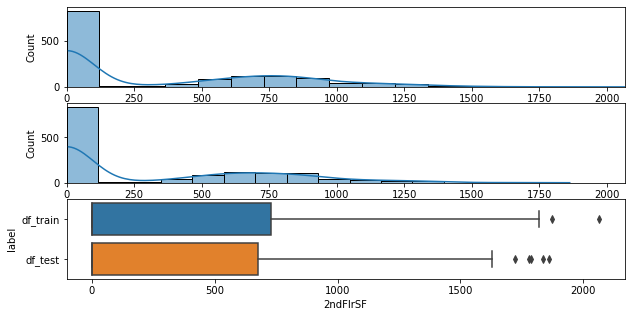

<Figure size 432x288 with 0 Axes>

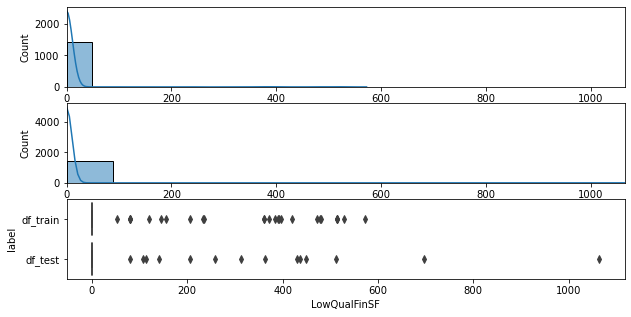

<Figure size 432x288 with 0 Axes>

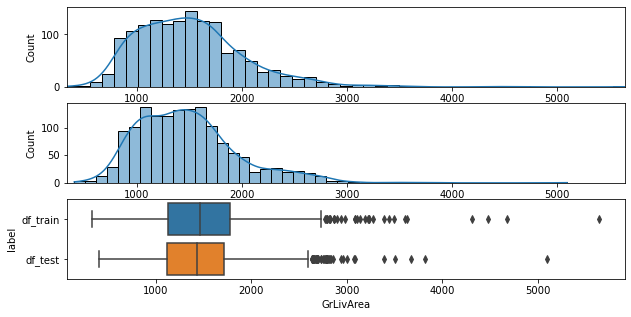

<Figure size 432x288 with 0 Axes>

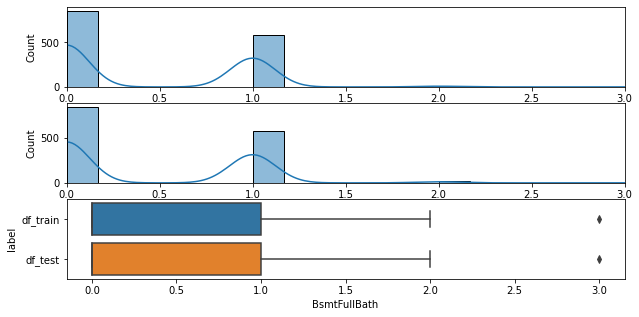

<Figure size 432x288 with 0 Axes>

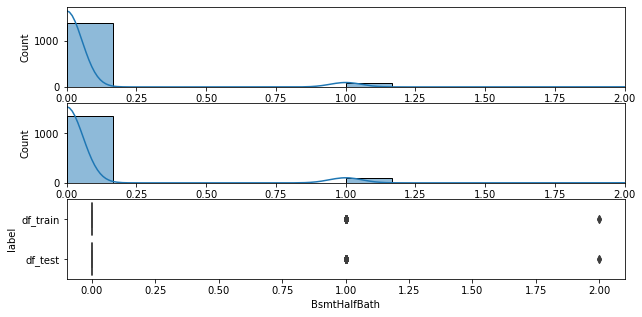

<Figure size 432x288 with 0 Axes>

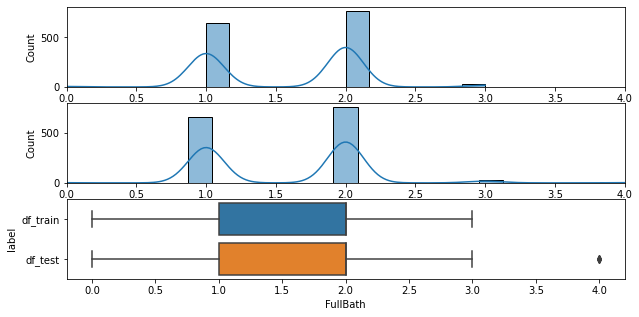

<Figure size 432x288 with 0 Axes>

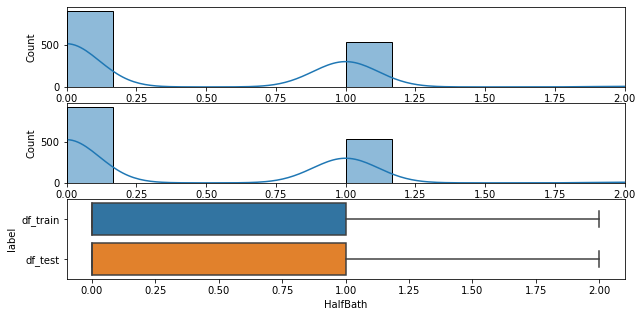

<Figure size 432x288 with 0 Axes>

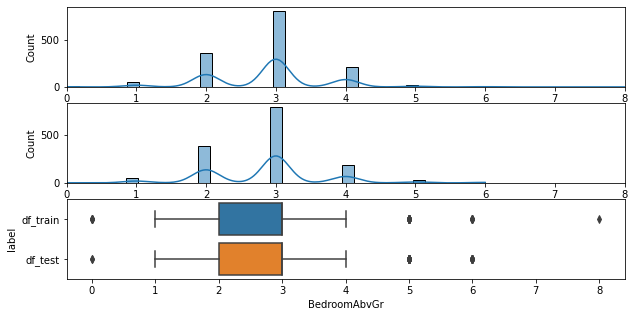

<Figure size 432x288 with 0 Axes>

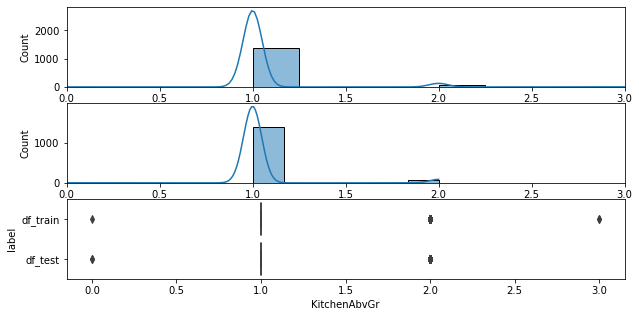

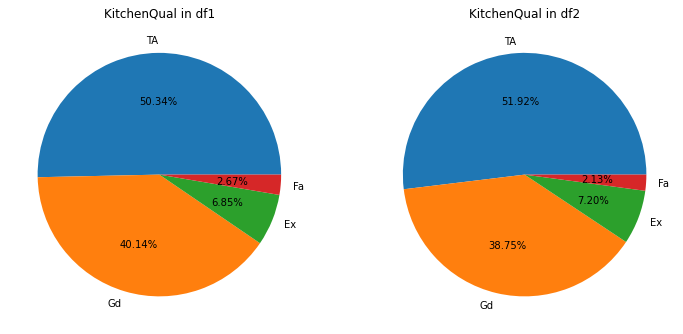

<Figure size 432x288 with 0 Axes>

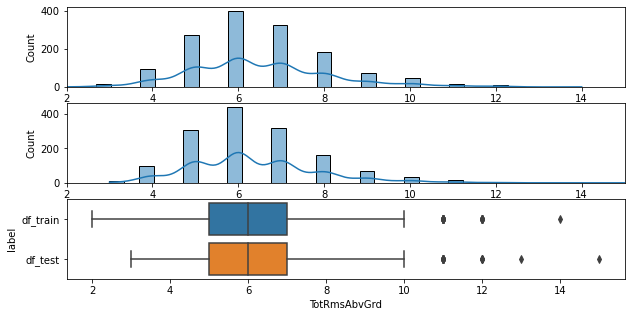

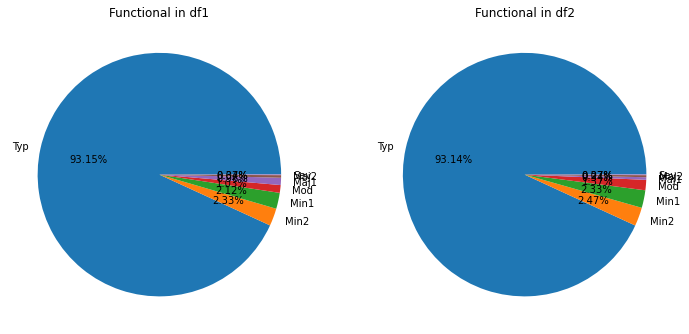

<Figure size 432x288 with 0 Axes>

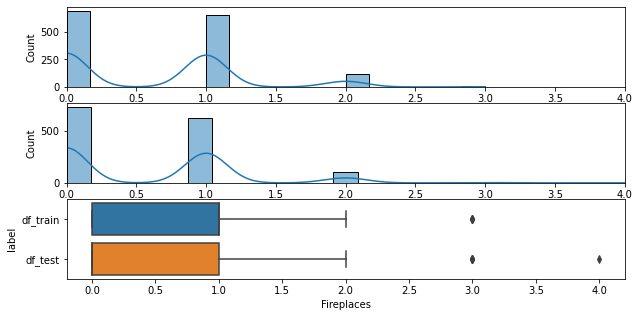

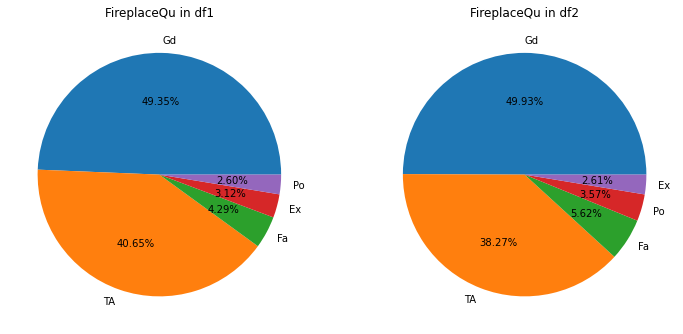

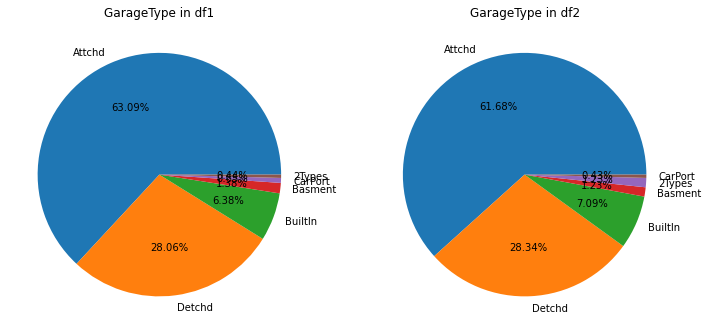

<Figure size 432x288 with 0 Axes>

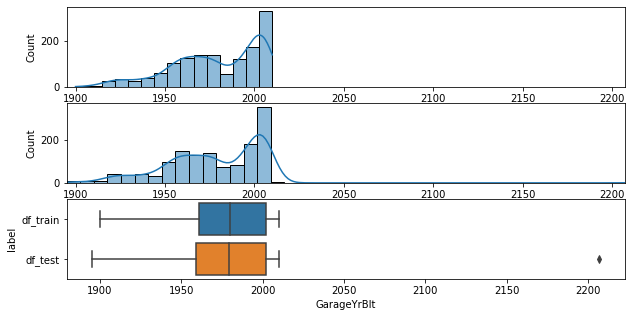

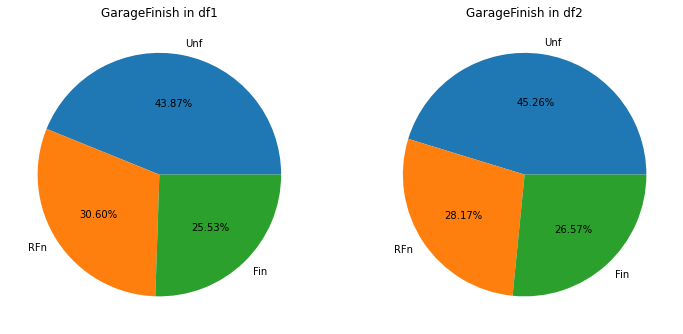

<Figure size 432x288 with 0 Axes>

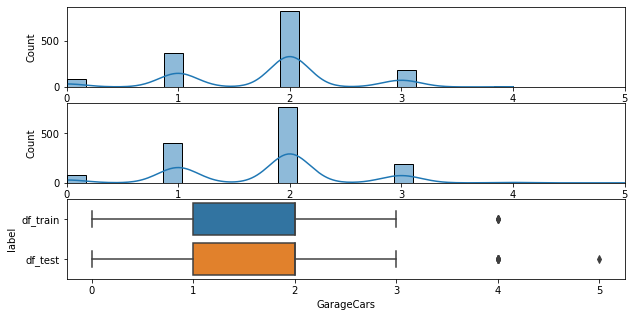

<Figure size 432x288 with 0 Axes>

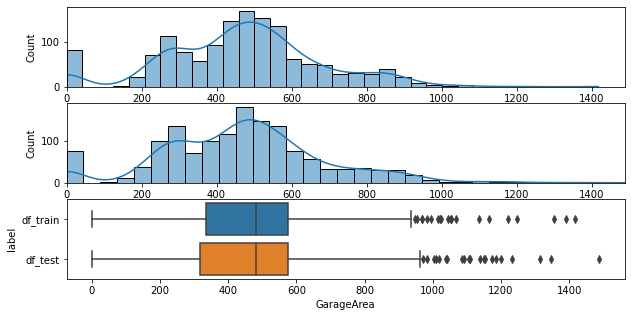

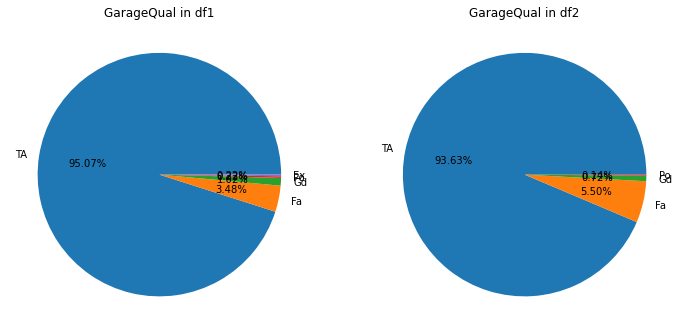

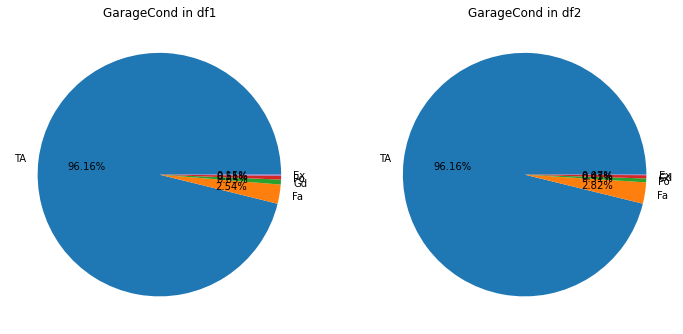

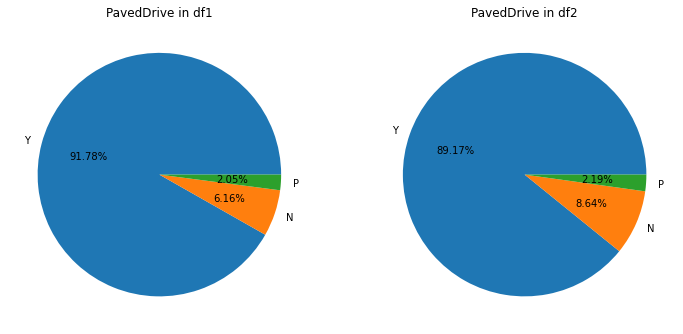

<Figure size 432x288 with 0 Axes>

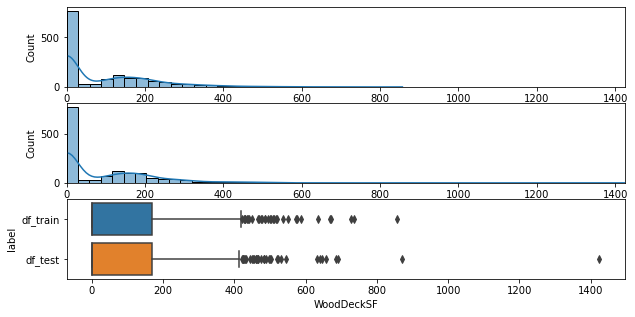

<Figure size 432x288 with 0 Axes>

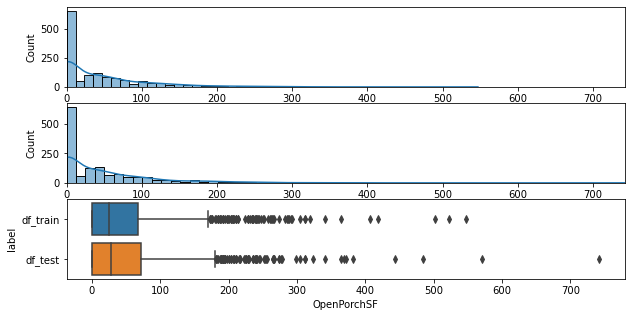

<Figure size 432x288 with 0 Axes>

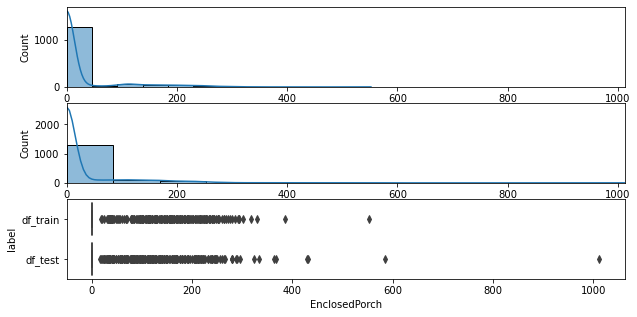

<Figure size 432x288 with 0 Axes>

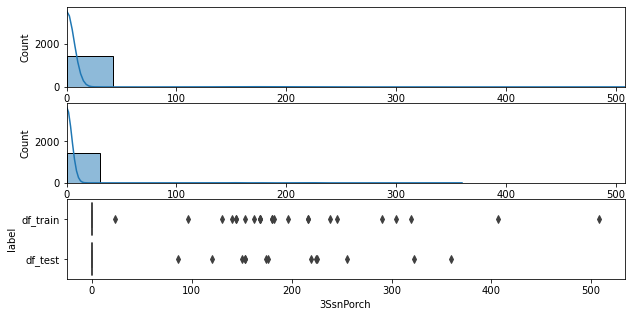

<Figure size 432x288 with 0 Axes>

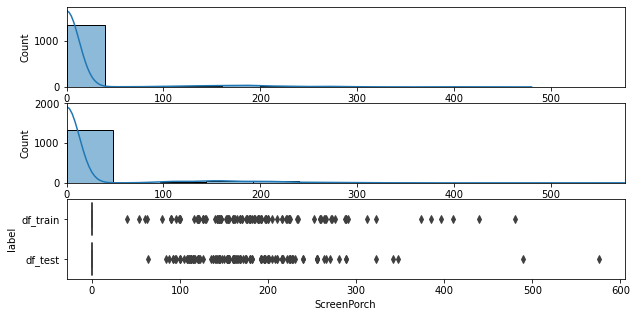

<Figure size 432x288 with 0 Axes>

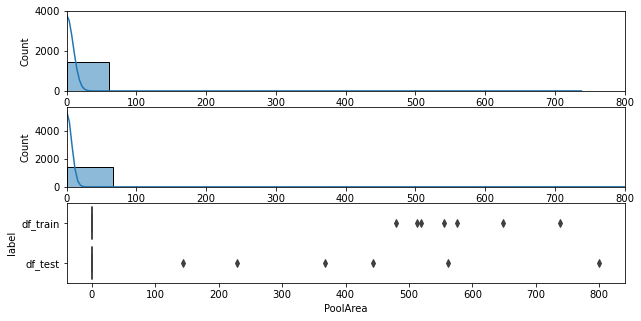

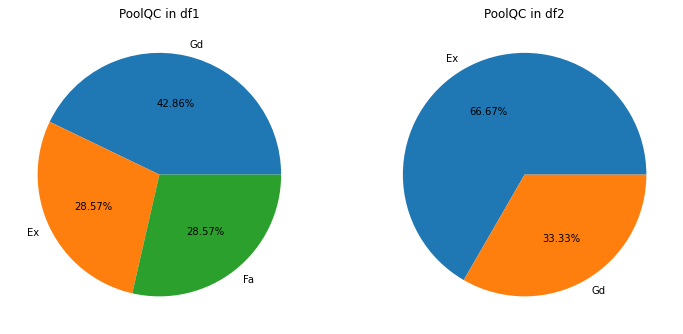

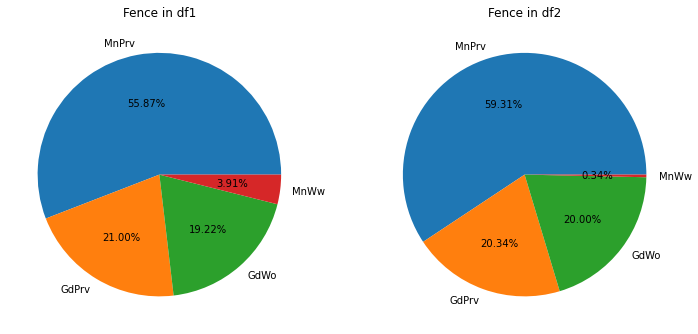

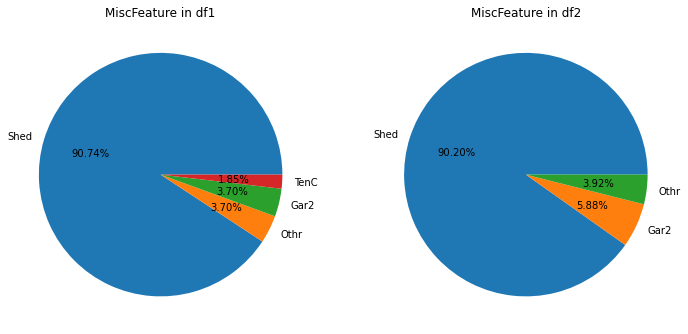

<Figure size 432x288 with 0 Axes>

Error in callback <function flush_figures at 0x7fe5fcc4a0d0> (for post_execute):


KeyboardInterrupt: 

In [4]:
for col in df1.columns.tolist():
    has_drift, result_df = auto_detection(
        df_train=df1,df_test=df2,col_name=col,
        file_name=OUTPUT_PATH+'STAT_'+col+'.png', return_result=True)
    if has_drift:
        result_df=pd.DataFrame(result_df)
        result_df.to_excel(writer, sheet_name='STAT_'+col)


In [ ]:
df1, df2 = auto_imputers(df1, df2)
df1, df2 = general_encoder(
    df1, df2,
    one_hot_cols=None,
    ordinal_cols=cat_cols,
    num_cols=num_cols
)
result = adversarial_detection(df1, df2, roc_tolerance=0.05, random_state=1234)

In [ ]:
for col in result:
    _, result_df = auto_detection(
        df_train=df1,df_test=df2,col_name=col,
        file_name=OUTPUT_PATH+'ADV_'+col+'.png',
        return_result=True
    )
    result_df.to_excel(writer, sheet_name='ADV_'+col)


In [ ]:
writer.save()